In [78]:
import numpy as np

import matplotlib.pyplot as plt

%matplotlib inline

In [79]:
$y = x + \mathrm{noise}$

SyntaxError: invalid syntax (<ipython-input-79-e7cf47879069>, line 1)

In [80]:
xx = 10 * ( np.random.random([1000]) - 0.5)
yy = xx + 0.5 * np.random.randn(1000)

In [81]:
xx.shape, yy.shape

((1000,), (1000,))

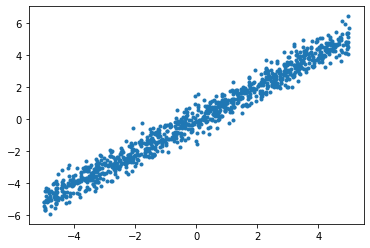

In [82]:
plt.plot(xx, yy,'.')

In [83]:
# Let's start with w set to be the exact correct value ! 
w = 1.0 

# ww will correct values of w after they are updated by each data point
ww = [w]

learning_rate = 0.01

for x,y in zip(xx,yy):
    yhat = w * x 
    grad = (yhat - y) * x 
    w = w - learning_rate * grad
    ww.append(w) # collect each new value of w

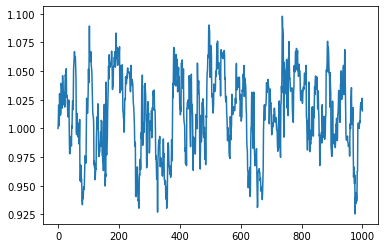

In [84]:
plt.plot(ww)

In [85]:
def calculate_J(x,y,w1,w2):
    """
    x, y are ndarrays of the same length
    w1 and w2 are weights of 2 layers of network
    """
    yhat  = w1 * w2 * x
    errs = (yhat - y)**2
    J = np.mean( errs )
    return J

In [86]:
w1_values = np.linspace(0.01,4,100)
w2_values = np.linspace(0.01,4,100)

In [87]:
J_grid = np.zeros([w1_values.size,w2_values.size])

for w1_index in range(0,w1_values.size):
    for w2_index in range(0,w2_values.size):
        J_grid[w1_index,w2_index] = calculate_J(xx, yy, w1_values[w1_index], w2_values[w2_index] )    

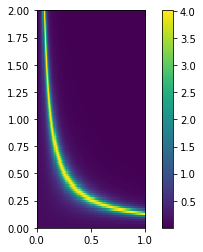

In [88]:
plt.imshow(1/J_grid.transpose(), origin='lower',extent=[0,1,0,2])
plt.colorbar()

In [12]:
# we start off with w1 and w2 different, but with w1 * w2 == 1.0 as before
w1 = 0.7
w2 = 1.0/0.7

# now we will collect both weights as learning proceeds
ww1 = [w1]
ww2 = [w2]

# try learning rates higher and lower than this value
learning_rate = 0.01

for x,y in zip(xx,yy):
    yhat = w1 * w2 * x 
    grad = (yhat - y) * x 
    w1 = w1 - learning_rate * grad * w2
    w2 = w2 - learning_rate * grad * w1
    
    ww1.append(w1) # collect each new value of w1
    ww2.append(w2) # collect each new value of w2

In [28]:
limit = 1000

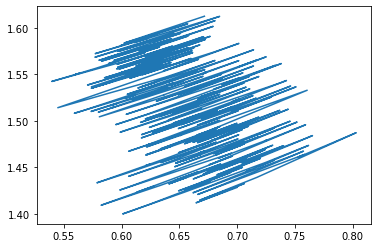

In [29]:
plt.plot(ww1[:limit],ww2[:limit])

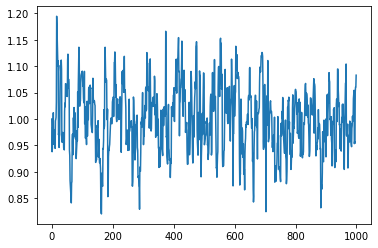

In [30]:
plt.plot( np.array(ww1[:limit]) * np.array(ww2[:limit]))

In [31]:
regulariser = 0.01 # quite big ! Try both larger and smaller values

# we start off with w1 and w2 different, but with w1 * w2 == 1.0 as before
w1 = 0.7
w2 = 1.0/0.7

# now we will collect both weights as learning proceeds
ww1 = [w1]
ww2 = [w2]

yhats = []
# try learning rates higher and lower than this value
learning_rate = 0.019

for x,y in zip(xx,yy):
    yhat = w1 * w2 * x 
    grad = (yhat - y) * x 
    w1 = w1 - learning_rate * grad * w2 - regulariser * w1
    w2 = w2 - learning_rate * grad * w1 - regulariser * w2
    
    yhats.append(yhat)
    ww1.append(w1) # collect each new value of w1
    ww2.append(w2) # collect each new value of w2
    
# now visualise ww1, ww2 as before to see if there has been instability

# also plot yy versus yhats : what happens when the regulariser is too big? 
# What is the compromise involved in introducing regularisatio

In [ ]:
# FashionMINST Dataset from PyTorch

In [89]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

In [90]:
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

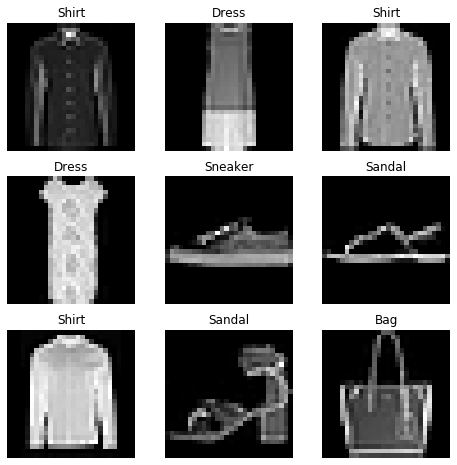

In [91]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

In [92]:
# Creating a Custom Dataset for the files

import os
import pandas as pd
from torchvision.io import read_image

class CustomImageDataset(Dataset):
    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
        self.img_labels = pd.read_csv(annotations_file)
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        image = read_image(img_path)
        label = self.img_labels.iloc[idx, 1]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label

In [93]:

def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
    self.img_labels = pd.read_csv(annotations_file)
    self.img_dir = img_dir
    self.transform = transform
    self.target_transform = target_transform

In [94]:
def __len__(self):
    return len(self.img_labels)

In [95]:
def __getitem__(self, idx):
    img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
    image = read_image(img_path)
    label = self.img_labels.iloc[idx, 1]
    if self.transform:
        image = self.transform(image)
    if self.target_transform:
        label = self.target_transform(label)
    return image, label

In [96]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


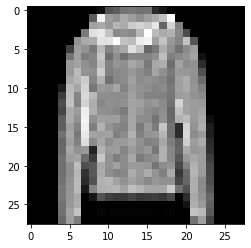

Label: 4


In [97]:
# Display image and label.

train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")

In [100]:
from torchvision import datasets
from torchvision.transforms import ToTensor
train_data = datasets.MNIST(
    root = 'data',
    train = True,                         
    transform = ToTensor(), 
    download = True,            
)
test_data = datasets.MNIST(
    root = 'data', 
    train = False, 
    transform = ToTensor()
)

In [101]:
# Print train_data and test_data size

In [102]:
print(train_data)

Dataset MNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()


In [103]:
print(test_data)

Dataset MNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()


In [104]:
print(train_data.data.size())
print(train_data.targets.size())

torch.Size([60000, 28, 28])
torch.Size([60000])


In [105]:
# Visualization of MNIST dataset

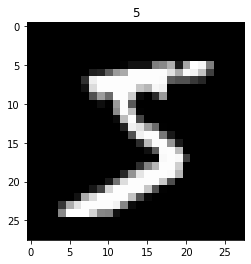

In [106]:
import matplotlib.pyplot as plt
plt.imshow(train_data.data[0], cmap='gray')
plt.title('%i' % train_data.targets[0])
plt.show()

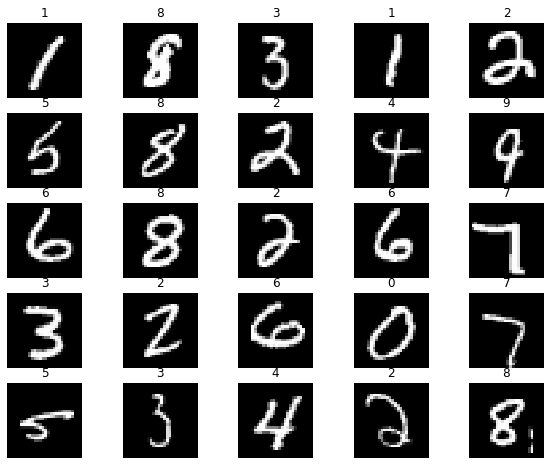

In [107]:
figure = plt.figure(figsize=(10, 8))
cols, rows = 5, 5
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(train_data), size=(1,)).item()
    img, label = train_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(label)
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

In [108]:
# Preparing data for training with DataLoaders

In [109]:
from torch.utils.data import DataLoader
loaders = {
    'train' : torch.utils.data.DataLoader(train_data, 
                                          batch_size=100, 
                                          shuffle=True, 
                                          num_workers=1),
    
    'test'  : torch.utils.data.DataLoader(test_data, 
                                          batch_size=100, 
                                          shuffle=True, 
                                          num_workers=1),
}
loaders

{'train': <torch.utils.data.dataloader.DataLoader at 0x20322948e88>,
 'test': <torch.utils.data.dataloader.DataLoader at 0x20322b177c8>}

In [110]:
# Define the Convolutional Neural Network model

In [111]:
import torch.nn as nn
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Sequential(         
            nn.Conv2d(
                in_channels=1,              
                out_channels=16,            
                kernel_size=5,              
                stride=1,                   
                padding=2,                  
            ),                              
            nn.ReLU(),                      
            nn.MaxPool2d(kernel_size=2),    
        )
        self.conv2 = nn.Sequential(         
            nn.Conv2d(16, 32, 5, 1, 2),     
            nn.ReLU(),                      
            nn.MaxPool2d(2),                
        )
        # fully connected layer, output 10 classes
        self.out = nn.Linear(32 * 7 * 7, 10)
    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        # flatten the output of conv2 to (batch_size, 32 * 7 * 7)
        x = x.view(x.size(0), -1)       
        output = self.out(x)
        return output, x    # return x for visualization

In [112]:
cnn = CNN()
print(cnn)

CNN(
  (conv1): Sequential(
    (0): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (out): Linear(in_features=1568, out_features=10, bias=True)
)


In [113]:
# Define loss function

In [114]:
loss_func = nn.CrossEntropyLoss()   
loss_func

CrossEntropyLoss()

In [115]:
# Define a Optimization Function

In [116]:
from torch import optim

optimizer = optim.Adam(cnn.parameters(), lr = 0.01)   
optimizer

Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 0.01
    weight_decay: 0
)

In [117]:
# Train the model

In [138]:
from torch.autograd import Variable

num_epochs = 10

def train(num_epochs, cnn, loaders):
    
    cnn.train()
        
    # Train the model
    total_step = len(loaders['train'])
        
    for epoch in range(num_epochs):
        for i, (images, labels) in enumerate(loaders['train']):
            
            # gives batch data, normalize x when iterate train_loader
            b_x = Variable(images)   # batch x
            b_y = Variable(labels)   # batch y
            output = cnn(b_x)[0]               
            loss = loss_func(output, b_y)
            
            # clear gradients for this training step   
            optimizer.zero_grad()           
            
            # backpropagation, compute gradients 
            loss.backward()    
            # apply gradients             
            optimizer.step()                
            
            if (i+1) % 100 == 0:
                print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                       .format(epoch + 1, num_epochs, i + 1, total_step, loss.item()))
            pass
        
        pass
    
    pass
train(num_epochs, cnn, loaders)

C:\Users\User\Anaconda3\lib\site-packages\torch\nn\functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ..\c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


Epoch [1/10], Step [100/600], Loss: 0.2416
Epoch [1/10], Step [200/600], Loss: 0.1003
Epoch [1/10], Step [300/600], Loss: 0.0394
Epoch [1/10], Step [400/600], Loss: 0.0308
Epoch [1/10], Step [500/600], Loss: 0.0746
Epoch [1/10], Step [600/600], Loss: 0.0585
Epoch [2/10], Step [100/600], Loss: 0.0671
Epoch [2/10], Step [200/600], Loss: 0.0136
Epoch [2/10], Step [300/600], Loss: 0.1360
Epoch [2/10], Step [400/600], Loss: 0.0672
Epoch [2/10], Step [500/600], Loss: 0.0312
Epoch [2/10], Step [600/600], Loss: 0.1079
Epoch [3/10], Step [100/600], Loss: 0.0190
Epoch [3/10], Step [200/600], Loss: 0.0129
Epoch [3/10], Step [300/600], Loss: 0.0066
Epoch [3/10], Step [400/600], Loss: 0.0158
Epoch [3/10], Step [500/600], Loss: 0.0351
Epoch [3/10], Step [600/600], Loss: 0.0344
Epoch [4/10], Step [100/600], Loss: 0.1530
Epoch [4/10], Step [200/600], Loss: 0.0219
Epoch [4/10], Step [300/600], Loss: 0.0222
Epoch [4/10], Step [400/600], Loss: 0.0686
Epoch [4/10], Step [500/600], Loss: 0.0759
Epoch [4/10

In [ ]:
# Evaluate the model on test data

In [142]:
def test():
    # Test the model
    cnn.eval()
    with torch.no_grad():
        correct = 0
        total = 0
        for images, labels in loaders['test']:
            test_output, last_layer = cnn(images)
            pred_y = torch.max(test_output, 1)[1].data.squeeze()
            accuracy = (pred_y == labels).sum().item() / float(labels.size(0))
            pass
    print('Test Accuracy of the model on the 10000 test images: %.2f' % accuracy)

pass
    

test()

Test Accuracy of the model on the 10000 test images: 0.99


In [143]:
# Print 10 predictions from test data

sample = next(iter(loaders['test']))
imgs, lbls = sample

In [144]:
actual_number = lbls[:10].numpy()
actual_number

array([2, 4, 1, 4, 0, 8, 1, 7, 9, 2], dtype=int64)

In [145]:
test_output, last_layer = cnn(imgs[:10])
pred_y = torch.max(test_output, 1)[1].data.numpy().squeeze()
print(f'Prediction number: {pred_y}')
print(f'Actual number: {actual_number}')

Prediction number: [2 4 1 4 0 8 1 7 9 2]
Actual number: [2 4 1 4 0 8 1 7 9 2]


In [150]:
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.cm as cm  # colormaps

%matplotlib inline

import torch
import torch.nn as nn
import torch.nn.functional as F  # this includes tensor functions that we can use in backwards pass
import torchvision
import torchvision.datasets as datasets
from torchvision import transforms

In [151]:
transform_list = transforms.Compose([ transforms.ToTensor(), transforms.Normalize(mean=[0.0], std=[1.0,]) ] )

In [152]:
mnist_trainset = datasets.MNIST(root='./data', train=True, download=True, transform=transform_list)

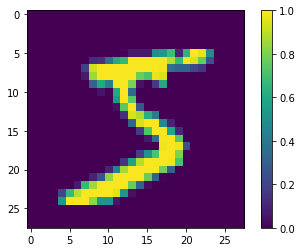

In [153]:
plt.imshow( mnist_trainset[0][0].view(28,28).numpy() )
plt.colorbar()

In [154]:
mnist_trainset[0][0]

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

In [155]:
mnist_trainset_small =  [ mnist_trainset[i] for i in range(0,4000) ] 

In [156]:
mnist_testset = datasets.MNIST(root='./data', train=False, download=True, transform=transform_list)

In [157]:
type( mnist_trainset ) # unfortunately this type information is not very informative!

torchvision.datasets.mnist.MNIST

In [158]:
len( mnist_trainset )

60000

In [159]:
im0 = mnist_trainset[0][0]

im0.shape

torch.Size([1, 28, 28])

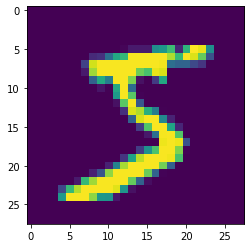

In [160]:
plt.imshow( im0.reshape(28,28).numpy())

In [161]:
def plot_images(images_to_plot, titles=None, ncols=6, thefigsize=(18,18)):
    
    n_images = images_to_plot.shape[0]
    
    nrows = np.ceil(n_images/ncols).astype(int)
    
    fig,ax = plt.subplots(nrows, ncols, sharex=True, sharey=True, figsize=thefigsize)
    ax = ax.flatten() # we can number the axes from 0 upwards with a single integer

    for i in range(n_images):
        ax[i].imshow( images_to_plot[i,0,:,:].reshape(28,28), cmap=cm.Greys ) 
            # cmap=cm.Greys plots in Grey scale so the image looks as if it were written
        ax[i].axis('off')  
        if titles is not None:
            ax[i].set_title(titles[i])

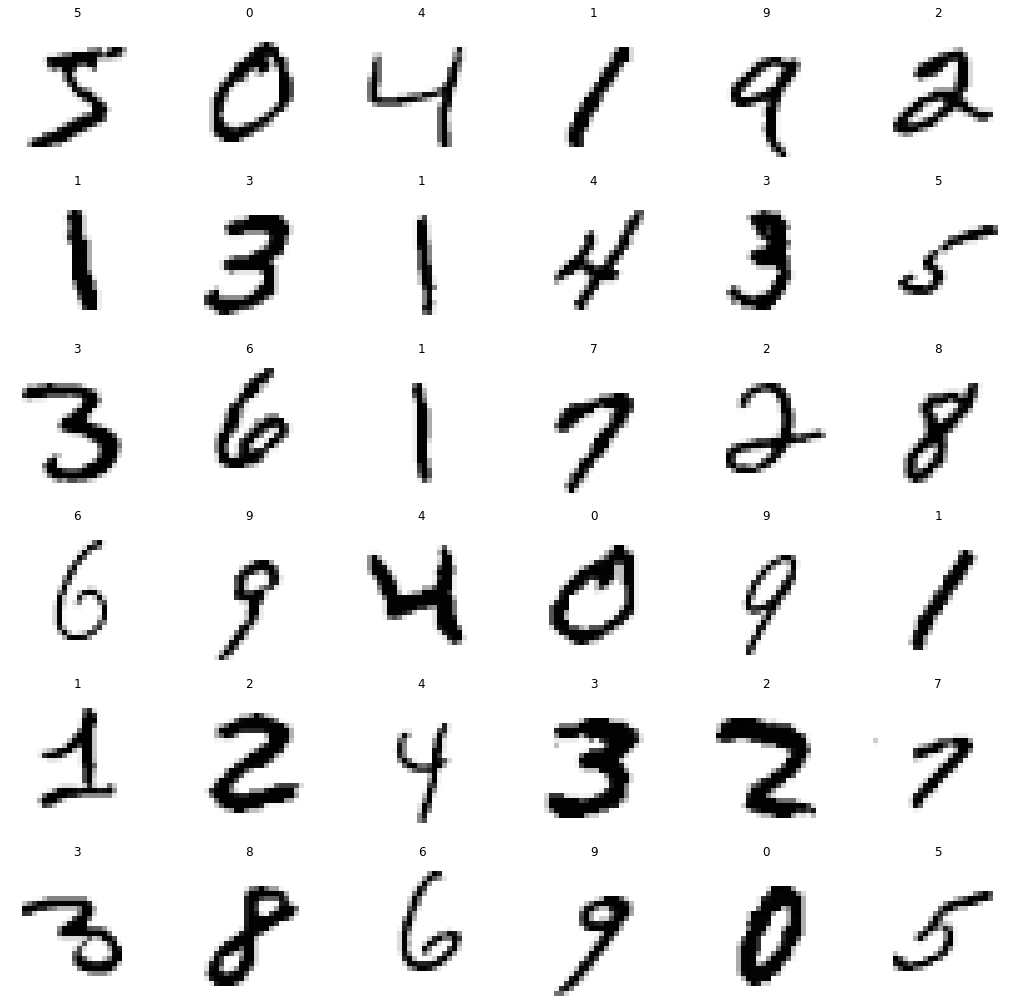

In [162]:
images_to_plot = np.array( [ mnist_trainset_small[i][0].numpy() for i in range(0,36)])
titles = [ mnist_trainset_small[i][1] for i in range(0,36) ] 
plot_images( images_to_plot, titles)

In [163]:
model1 = nn.Sequential( 
        nn.Conv2d(1,6,3), # takes one input channel (greyscale), gives 6 output channes, each from a 3x3 convolutional neuron
        nn.ReLU()) 
      #  nn.Conv2d(6,6,3), # takes 26 x 26 to 24 x 24
       # nn.ReLU(), 
      #  nn.MaxPool2d(2,2) )
    

In [164]:
type( model1 )

torch.nn.modules.container.Sequential

In [165]:
mnist_trainset[0][0].shape

torch.Size([1, 28, 28])

In [166]:
output = model1( mnist_trainset[0][0].view(1,1,28,28) )

output.shape

torch.Size([1, 6, 26, 26])

In [167]:
model1 = [] # reclaim the space

In [168]:
# our simplest neural net - it is just going to be a linear layer and then softmax
class NN1( nn.Module ):
    
    def __init__(self): 
        super(NN1, self).__init__()
        self.layers = nn.Sequential( 
            nn.Flatten(), 
            nn.Linear(784,10))  # a linear layer (a matrix, plus biases) with 784 inputs and 10 outputs
             # if we are going to make probabilistic categorical predictions, it is more flexible to allow unnormalised 
             # outputs, because we can use  different functions for the predictions and and in calculating the loss, as 
             # we shall soon see
    
    
    def forward( self, x ): # computes the forward pass ... this one is particularly simple
        x = self.layers( x )
        return x

In [169]:
nn1 = NN1()

In [170]:
tmp = nn1.forward( mnist_trainset[0][0])
tmp

tensor([[-0.0673,  0.0923, -0.2724,  0.0864,  0.2214,  0.0503,  0.1506,  0.0197,
         -0.1809, -0.0165]], grad_fn=<AddmmBackward>)

In [171]:
tmp_probs = F.softmax( tmp, dim=1)
tmp_probs 

tensor([[0.0918, 0.1077, 0.0748, 0.1071, 0.1225, 0.1033, 0.1142, 0.1002, 0.0819,
         0.0966]], grad_fn=<SoftmaxBackward>)

In [172]:
# to examine the values of tensors with gradients attached, we must first detach the gradient, and then 
# convert to numpy, thus: 
tmp_probs_n = tmp_probs.detach().numpy()
tmp_probs_n

array([[0.09180514, 0.10769668, 0.07478236, 0.1070585 , 0.12254074,
        0.10326494, 0.11415816, 0.1001562 , 0.08194628, 0.09659103]],
      dtype=float32)

In [173]:
tmp_probs_n[0,5]

0.103264935

In [174]:
-np.log( tmp_probs_n[0,5] ) 

2.2704575

In [ ]:
# At last: this is the log-loss, which is the negative log of the predicted probability of the true class (in this case 5) 

# A typical predicted probability will be near to 0.1, with a loss that is near to -np.log(0.1) which is -2.30

In [ ]:
# Our next task is to construct the loss function, which will produce a single loss for a batch of examples. 

# This is the final leaf of the computational graph, from which we back-propagate to find the gradients. 

# There is a single torch function that will take unnormalised outputs, and combine softmax and log-loss efficiently: 

In [175]:
loss_function = nn.CrossEntropyLoss() 

In [176]:
loss_function( tmp, torch.LongTensor([5]))

tensor(2.2705, grad_fn=<NllLossBackward>)

In [177]:
# DataLoader is a useful utility class provided by pytorch for extracting minibatches from 
# a large dataset. 

trainloader = torch.utils.data.DataLoader( mnist_trainset_small, batch_size=4, shuffle=True)
testloader = torch.utils.data.DataLoader( mnist_testset, batch_size=4, shuffle=True)

# if you want to change the batch size, you need to define a new dataloader: 
# the dataloader is a lightweight class that just provides iteration over the dataset

tmpiter = iter(trainloader)

images, labels = tmpiter.next() # the minibatch is a list of [ images, labels ]
images.shape
labels

tmp = nn1.forward( images )
tmp  # note that these are 4 sets of probabilistic predictions, but unnormalised by softmax. 

tensor([[ 0.0216, -0.0634, -0.0320,  0.2091,  0.1046, -0.3377, -0.2481, -0.1281,
          0.1162, -0.0467],
        [-0.2110,  0.1939, -0.3766,  0.1275,  0.1183, -0.3739,  0.2821,  0.0808,
         -0.0814,  0.0261],
        [-0.1448,  0.1873, -0.3263,  0.0260,  0.3879, -0.2336, -0.1399, -0.1664,
         -0.0078, -0.1093],
        [ 0.2058,  0.1420,  0.0179,  0.1979,  0.3067, -0.2187, -0.0077, -0.0898,
          0.1864,  0.2783]], grad_fn=<AddmmBackward>)

In [178]:
loss_function(tmp, labels )

tensor(2.4133, grad_fn=<NllLossBackward>)

In [180]:
nn1.parameters()

<generator object Module.parameters at 0x00000203223D89C8>

In [181]:
params = [ p for p in nn1.parameters() ] 

In [182]:
params


[Parameter containing:
 tensor([[-0.0208, -0.0260,  0.0203,  ..., -0.0161, -0.0063,  0.0211],
         [-0.0306,  0.0130,  0.0192,  ...,  0.0196,  0.0260, -0.0336],
         [ 0.0161, -0.0164,  0.0057,  ...,  0.0045, -0.0176, -0.0071],
         ...,
         [ 0.0155, -0.0231,  0.0156,  ..., -0.0307, -0.0249, -0.0230],
         [-0.0334,  0.0011, -0.0077,  ..., -0.0070, -0.0260, -0.0160],
         [ 0.0319,  0.0156,  0.0033,  ...,  0.0035,  0.0242, -0.0295]],
        requires_grad=True), Parameter containing:
 tensor([-0.0232, -0.0043, -0.0066,  0.0192,  0.0253, -0.0124, -0.0004, -0.0197,
         -0.0133, -0.0194], requires_grad=True)]

In [183]:
[ p.shape for p in params ]

[torch.Size([10, 784]), torch.Size([10])]

In [184]:

import torch.optim as optim 

optimizer1 = optim.RMSprop(nn1.parameters(), lr=0.01)

In [185]:
# Now we are ready to construct a learning loop.

In [186]:
# notice that we create all the ingredients of the process again within this cell, 
# so that we train a newly initialised neural net with a newly initialised optimizer
# containing the parameters of that neural net ....


trainloader = torch.utils.data.DataLoader( mnist_trainset_small, batch_size=32, shuffle=True)
testloader = torch.utils.data.DataLoader( mnist_testset, batch_size=32, shuffle=True)

nn1 = NN1()
optimizer1 = optim.RMSprop( nn1.parameters(), lr=0.0001 )

for epoch in range(200): # number of times to loop over the dataset
    current_loss = 0.0 
    n_mini_batches = 0
    
    for i, mini_batch in enumerate( trainloader, 0 ):
        images, labels = mini_batch
        
             
        # zero the parameter gradients
        # all the parameters that are being updated are in the optimizer, 
        # so if we zero the gradients of all the tensors in the optimizer, 
        # that is the safest way to zero all the gradients
        optimizer1.zero_grad()
        
        outputs = nn1(images)
        loss = loss_function ( outputs, labels )
        loss.backward() # does the backward pass and computes all gradients
        optimizer1.step() # does one optimisation step
        
        n_mini_batches += 1 
        current_loss += loss.item() # remember that the loss is a zero-order tensor
        # so that to extract its value, we use .item(), as we cannot index as there are no dimensions
        
     
    print('Epoch %d loss: %.3f' %(epoch+1, current_loss / n_mini_batches ))

Epoch 1 loss: 1.936
Epoch 2 loss: 1.580
Epoch 3 loss: 1.358
Epoch 4 loss: 1.189
Epoch 5 loss: 1.057
Epoch 6 loss: 0.952
Epoch 7 loss: 0.867
Epoch 8 loss: 0.798
Epoch 9 loss: 0.741
Epoch 10 loss: 0.693
Epoch 11 loss: 0.654
Epoch 12 loss: 0.620
Epoch 13 loss: 0.590
Epoch 14 loss: 0.565
Epoch 15 loss: 0.543
Epoch 16 loss: 0.523
Epoch 17 loss: 0.506
Epoch 18 loss: 0.490
Epoch 19 loss: 0.476
Epoch 20 loss: 0.463
Epoch 21 loss: 0.452
Epoch 22 loss: 0.441
Epoch 23 loss: 0.431
Epoch 24 loss: 0.422
Epoch 25 loss: 0.413
Epoch 26 loss: 0.406
Epoch 27 loss: 0.398
Epoch 28 loss: 0.391
Epoch 29 loss: 0.385
Epoch 30 loss: 0.379
Epoch 31 loss: 0.373
Epoch 32 loss: 0.368
Epoch 33 loss: 0.363
Epoch 34 loss: 0.358
Epoch 35 loss: 0.353
Epoch 36 loss: 0.349
Epoch 37 loss: 0.345
Epoch 38 loss: 0.341
Epoch 39 loss: 0.337
Epoch 40 loss: 0.334
Epoch 41 loss: 0.330
Epoch 42 loss: 0.327
Epoch 43 loss: 0.324
Epoch 44 loss: 0.320
Epoch 45 loss: 0.317
Epoch 46 loss: 0.314
Epoch 47 loss: 0.312
Epoch 48 loss: 0.309
E

In [187]:
# this code calculates the error rate on the validation set
correct = 0 
total = 0 
with torch.no_grad():  # we do not neet to compute the gradients when making predictions on the validation set
    for data in testloader: 
        images, labels = data
        outputs = nn1(images)
        _, predicted = torch.max( outputs, dim=1)
        total += labels.size(0) # the number of labels, which is just the size of the batch 
        correct += (predicted == labels).sum().item() # once again, note that the sum is a zero-dimensional tensor, 
                                                      # so we must access its value using .item()
print( "Accuracy on test set: %d %%" %(100 * correct/total))


Accuracy on test set: 90 %
